# 数据导入

In [4]:
import pandas as pd
import numpy as np
import os
os.chdir(r'\Prophet')############adjust
data=pd.read_csv('prophet_TP15.csv')
data['date']=pd.to_datetime(data['date'])
data_train=data[data['date']<'20200226'][['date','sum_xy','yhat']]
data_pred=data[data['date']>='20200226'][['date','sum_xy','yhat']]
data_train.columns=['date','y','pred']
data_pred.columns=['date','y','pred']
train=data[['date','sum_xy','yhat']].merge(data_train,how='left',on='date')[['date','y','pred']]
pred=data[['date','sum_xy','yhat']].merge(data_pred,how='left',on='date')[['date','y','pred']]

# 画图

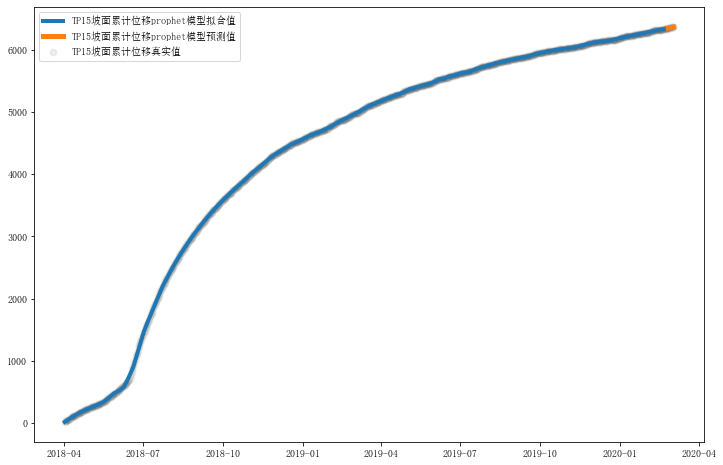

In [6]:
import matplotlib.pyplot as plt
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimSun']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.figure(figsize=(12,8))

plt.scatter(data.date,data['sum_xy'],label='TP15坡面累计位移真实值',alpha=0.06,c='black',linewidth=2)
plt.plot(data.date,train['pred'],label='TP15坡面累计位移prophet模型拟合值',linewidth=4)
plt.plot(data.date,pred['pred'],label='TP15坡面累计位移prophet模型预测值',linewidth=5)
plt.legend()

plt.savefig(r'\Prophet\结果图\prophet_TP15.png',bbox_inches='tight',dpi = 1000)############adjust